In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
try:
    import os
    os.chdir("E:\projects")
    p=pd.read_csv('fraud_detection.csv')
except Exception as e:
    print(e)

In [3]:
p.drop(p.iloc[:,:1],axis=1,inplace=True)

In [4]:
p.sample(20)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
11933,34,1,4.965339,paypal,0.000694,0
24539,2000,1,4.745402,paypal,0.000000,0
37563,1280,1,4.921349,creditcard,0.004861,0
35348,1610,1,2.948940,creditcard,155.798611,0
16427,3,1,5.040929,creditcard,2.943056,0
7351,376,1,4.742303,creditcard,0.000000,0
26747,827,1,4.836982,creditcard,0.000000,0
36297,2000,1,4.505662,creditcard,335.915278,0
1988,1,1,4.461622,creditcard,0.000000,1
6401,151,2,4.886641,creditcard,0.000000,0


In [5]:
p.duplicated().sum()

5726

In [6]:
p.drop_duplicates(inplace=True)

In [7]:
p.duplicated().sum()

0

In [8]:
p.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,33495.000000,33495.000000,33495.000000,33495.000000,33495.000000
mean,827.790775,1.097149,4.736297,143.109976,0.008777
std,771.376913,0.610850,0.403262,301.279953,0.093277
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,89.000000,1.000000,4.742303,0.000000,0.000000
50%,591.000000,1.000000,4.886641,1.107639,0.000000
75%,1634.000000,1.000000,4.962055,129.006250,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [9]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33495 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        33495 non-null  int64  
 1   numItems              33495 non-null  int64  
 2   localTime             33495 non-null  float64
 3   paymentMethod         33495 non-null  object 
 4   paymentMethodAgeDays  33495 non-null  float64
 5   label                 33495 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='paymentMethod', ylabel='count'>

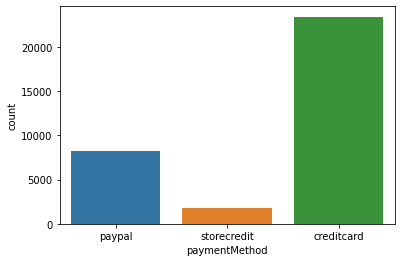

In [10]:
sns.countplot(p.paymentMethod)

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='numItems', ylabel='count'>

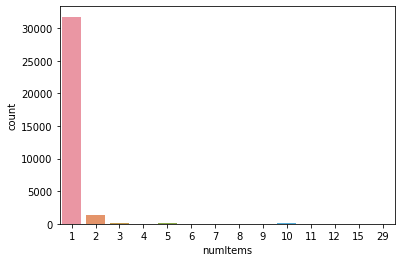

In [11]:
sns.countplot(p.numItems)

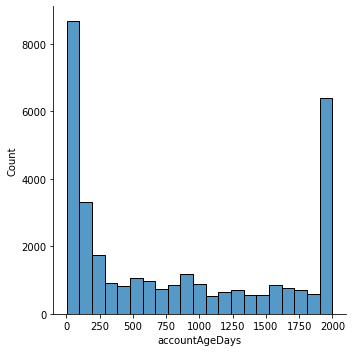

In [12]:
sns.displot(p.accountAgeDays)

In [13]:
#catagorical into numerical
p['paymentMethod']=pd.get_dummies(p['paymentMethod'])
p['paymentMethod']

0        0
1        0
2        1
3        1
4        1
        ..
39215    1
39217    1
39218    1
39219    1
39220    0
Name: paymentMethod, Length: 33495, dtype: uint8

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    p.drop('label', axis=1), p['label'],
    test_size=0.23, random_state=42)

In [15]:
clf = LogisticRegression().fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('accuracy',accuracy_score(y_pred, y_test)*100)

accuracy 100.0


In [16]:
# Compare test set predictions with ground truth labels
print(confusion_matrix(y_test, y_pred))

[[7639    0]
 [   0   65]]


In [46]:
fpr,tpr,thresholds=roc_curve(y_test, y_pred)

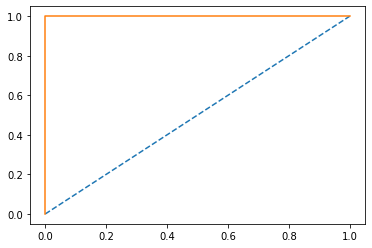

In [52]:
plt.plot([0, 1], [0,1] ,linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()
plt.show()


In [53]:
roc_auc_score(y_test, y_pred)

1.0